# 2. Efficient Figure Creation Tips: Abstracting Common Steps

## In this section:
* We will learn A
* We will learn B
* We will learn C

Let's start the exploration process.
You are given a list of `dino_vectors`, and we need to create a square figure (10cm * 10cm) with a grid and tickables, where each gid cell is (1cm * 1cm).

By the end of tutorial you'll learn how to create complex plots with ease. For example like this:

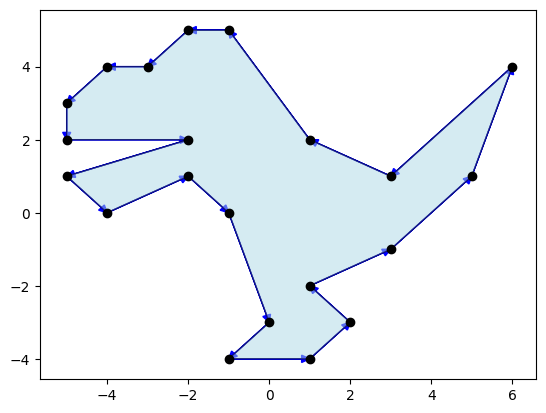

In [1]:
from abstractions import Plot, Point, Vector, Polygon

# prepare the data
dino_vectors = (
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
)

grid_points = [Point(x, y) for x, y in dino_vectors]
grid_vectors = [
    Vector(start, end)
    for start, end in zip(grid_points, grid_points[1:] + [grid_points[0]])
]

point_style = {"marker": "o", "color": "black"}
vector_style = {
    "head_width": 0.2,
    "head_length": 0.2,
    "fc": "blue",
    "ec": "blue",
    "length_includes_head": "True",
}
polygon_style = {"color": "lightblue", "edgecolor": "black", "alpha": 0.5}

# the plotting happens here
fig, ax = (
    Plot()
    .add(grid_points, point_style)
    .add(grid_vectors, vector_style)
    .add(Polygon(grid_points), polygon_style)
    .get_figure()
)

First, we import `Plot`, `Point`, `Vector`, and `Polygon` classes from the `abstractions` module.
* `Plot` is a class that abstracts the common steps of creating a figure.
* `Point` represents a point to draw.
* `Vector` represents a vector to draw.
* `Polygon` represents a polygon to draw.

With this four classes, we can create complex figures with ease.
    
We could ask ourselves a ton of questions, for example:
* How can we resize the figure to the proper size as we've learned in the previous section?
* Can we name the axes?
* I don't generate figures without the title

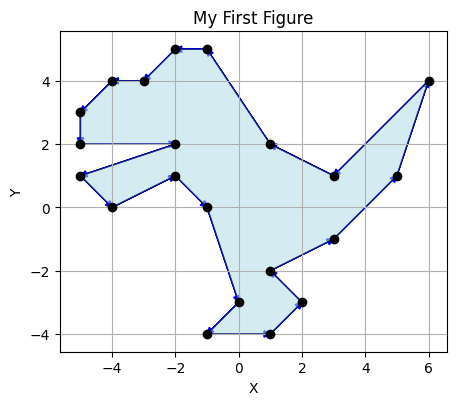

In [2]:
fig.set_size_inches((5, 5))

ax.set_xlabel("X")
ax.set_aspect("equal")
ax.set_ylabel("Y")
ax.set_title("My First Figure")
ax.grid(True)

fig.get_figure()

The secret is that we've abstracted the common steps into a class `Plot` and the common objects into classes `Point`, `Vector`, and `Polygon`.
In the next sections we'll learn how to create these classes.
But for now let's just add a few more examples to fully understand the power of this abstraction.

TO-DO: add linear transformation examples from the math book.

# TO-DO: add linear transformation examples from the math book.

v1.start.x=0, v2.end.x=1
x=5, y=7
Vector(Point(0, 0), Point(5, 7))
v1.start.x=0, v2.end.x=1
x=5, y=7


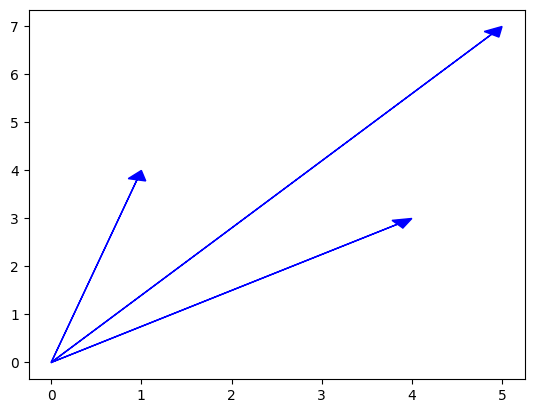

In [3]:
def sum_vectors(v1: Vector, v2: Vector) -> Vector:
    print(f"{v1.start.x=}, {v2.end.x=}")
    x = v1.end.x + v2.end.x
    y = v1.end.y + v2.end.y
    print(f"{x=}, {y=}")
    return Vector(
        Point(v1.start.x + v1.start.x, v1.start.y + v1.start.y),
        Point(v1.end.x + v2.end.x, v1.end.y + v2.end.y),
    )


v1 = Vector(Point(0, 0), Point(4, 3))
v2 = Vector(Point(0, 0), Point(1, 4))

print(f"{sum_vectors(v1, v2)}")

fig, ax = (
    Plot()
    .add([v1, v2], vector_style)
    .add([sum_vectors(v1, v2)], vector_style)
    .get_figure()
)

In [4]:
point = Point(1, 1)
vector = Vector(Point(0, 0), Point(2, 2))
new_point = point.add_vector(vector)
print(new_point)  # Output: Point(3, 3)

Point(3, 3)


In [5]:
from rich import print


def update_dict(d: dict, kwargs: dict) -> dict:
    updated_dict = dict(d)
    updated_dict.update(kwargs)
    return updated_dict


vector_style = {
    "head_width": 0.2,
    "head_length": 0.2,
    "fc": "blue",
    "ec": "blue",
    "length_includes_head": "True",
}

print(
    f"{vector_style=}, {update_dict(vector_style, {'alpha': 0.5, 'color': 'red', 'linestyle': 'x'})=}"
)

vector_style={'head_width': 0.2, 'head_length': 0.2, 'fc': 'blue', 'ec': 'blue', 'length_includes_head': 'True'}, 
update_dict(vector_style, {'alpha': 0.5, 'color': 'red', 'linestyle': 'x'})={'head_width': 0.2, 'head_length': 0.2,
'fc': 'blue', 'ec': 'blue', 'length_includes_head': 'True', 'alpha': 0.5, 'color': 'red', 'linestyle': 'x'}

AttributeError: 'Point' object has no attribute 'add_vector'

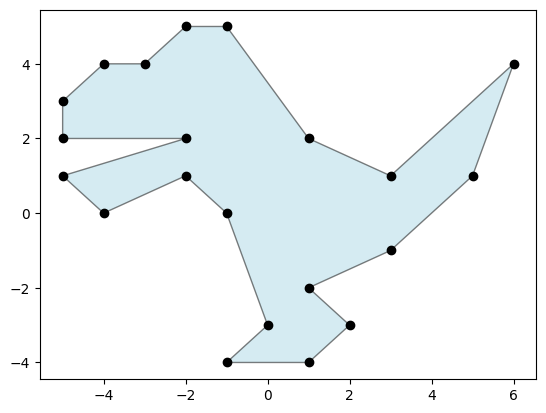

In [30]:
translation_vector = Vector(Point(0, 0), Point(-7, -3))


fig, ax = (
    Plot()
    .add(grid_points, point_style)
    .add(Polygon(grid_points), polygon_style)
    .add(
        [point.add_vector(translation_vector) for point in grid_points],
        update_dict(point_style, {"alpha": 0.2}),
    )
    .add(
        Polygon([point.add_vector(translation_vector) for point in grid_points]),
        polygon_style,
    )
    .add(
        [
            Vector(original, translated)
            for original, translated in zip(
                grid_points,
                [point.add_vector(translation_vector) for point in grid_points],
            )
        ],
        update_dict(
            vector_style,
            {
                "alpha": 0.5,
                "head_width": 0.2,
                "head_length": 0.2,
                "length_includes_head": "True",
                "zorder": 10,
            },
        ),
    )
    .get_figure()
)

fig.set_size_inches((5, 5))
ax.set_aspect("equal")
ax.set_title("Translation of Dino")
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0)
ax.grid(True, linestyle=":")
ax.set_xticks(range(-13, 8, 2))
ax.set_yticks(range(-7, 7, 2))

fig.savefig("results/translation_of_dino.png", dpi=600)
# fig.get_figure()

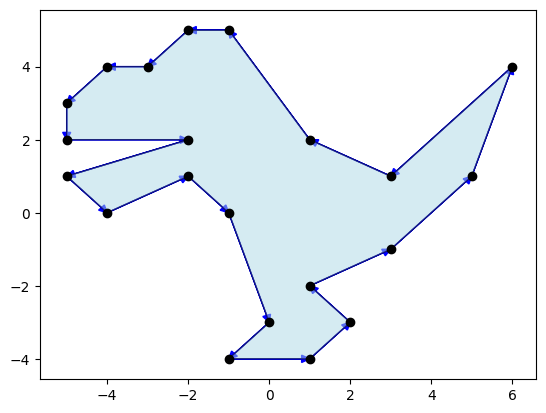

In [7]:
# def hundred_dinos():
#     translations = [(12*x,10*y)
#                     for x in range(−5,5)
#                     for y in range(−5,5)]
#     dinos = [Polygon(*translate(t, dino_vectors),)
#                 for t in translations]
#     draw(*dinos, grid=None, axes=None, origin=None)

# hundred_dinos()

fig, ax = (
    Plot()
    .add(grid_points, point_style)
    .add(grid_vectors, vector_style)
    .add(Polygon(grid_points), polygon_style)
    .get_figure()
)

In [8]:
translation_vector = Vector(Point(0, 0), Point(12, 0))
print(translation_vector.multiply_constant(2))

Vector(Point(0, 0), Point(24, 0))

## Excercises

### Excercise 1

Create a Dynosoar without filling it with color.

### Excercise 2

Create a plot of X, Y:

```python
X = np.linspace(-2 * np.pi, +2 * np.pi, 500)
Y = np.sin(X) + 0.4 * np.cos(3 + 5 * X)
```

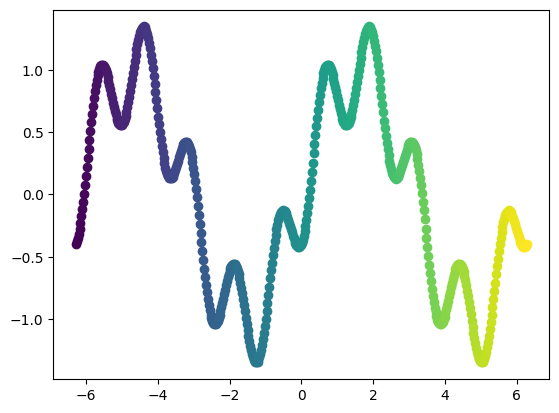

In [9]:
from matplotlib import pyplot as plt
import numpy as np

X = np.linspace(-2 * np.pi, +2 * np.pi, 500)
Y = np.sin(X) + 0.4 * np.cos(3 + 5 * X)

fig, ax = Plot().add([Point(x, y) for x, y in zip(X, Y)]).get_figure()

cmap = plt.cm.viridis
ax.get_children()
colors = np.linspace(0, 1, len(X))
for i, child in enumerate(ax.get_children()):
    # Check if the child is an instance of matplotlib.lines.Line2D
    if isinstance(child, plt.Line2D):
        # Set the color of the line using the colormap
        child.set_color(cmap(colors[i]))

### Excercise 3


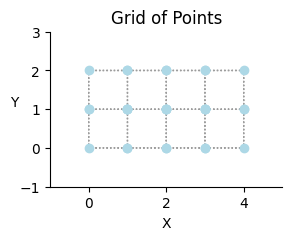

In [29]:
import math

grid_element = [
    Point(0, 0),
    Point(0, 1),
    Point(1, 1),
    Point(1, 0),
]

grid = set()  # Use a set to store unique points
for i in range(4):  # Rows
    for j in range(2):  # Columns
        translated_element = [Point(p.x + i, p.y + j) for p in grid_element]
        grid.update(translated_element)  # Update the set with translated points

dashed_line = {
    "linestyle": ":",
    "linewidth": 1,
    "color": "gray",
    "alpha": 0.5,
}

shift = Vector(Point(0, 0), Point(0.5, 0.5))

fig, ax = (
    Plot()
    .add(list(grid), {"color": "lightblue", "marker": "o"})
    .add(Vector(Point(0, 0), Point(4, 0)), dashed_line)
    .add(Vector(Point(0, 0), Point(0, 2)), dashed_line)
    .add(Vector(Point(4, 0), Point(4, 2)), dashed_line)
    .add(Vector(Point(0, 2), Point(4, 2)), dashed_line)
    .add(Vector(Point(1, 0), Point(1, 2)), dashed_line)
    .add(Vector(Point(2, 0), Point(2, 2)), dashed_line)
    .add(Vector(Point(3, 0), Point(3, 2)), dashed_line)
    .add(Vector(Point(0, 1), Point(4, 1)), dashed_line)
    .add(Vector(Point(0, 0), Point(4, 0)), dashed_line)
    .add(Vector(Point(0, 0), Point(0, 2)), dashed_line)
    .add(Vector(Point(4, 0), Point(4, 2)), dashed_line)
    .add(Vector(Point(0, 2), Point(4, 2)), dashed_line)
    .add(Vector(Point(1, 0), Point(1, 2)), dashed_line)
    .add(Vector(Point(2, 0), Point(2, 2)), dashed_line)
    .add(Vector(Point(3, 0), Point(3, 2)), dashed_line)
    .add(Vector(Point(0, 1), Point(4, 1)), dashed_line)
    .get_figure()
)

fig.set_size_inches((3, 3))
ax.set_aspect("equal")
ax.set_title("Grid of Points")
ax.set_xlim(-1, 5)
ax.set_ylim(-1, 3)
ax.set_xlabel("X")
ax.set_ylabel("Y", rotation=0)
ax.spines[["right", "top"]].set_visible(False)

In [11]:
dino_vectors = (
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
)

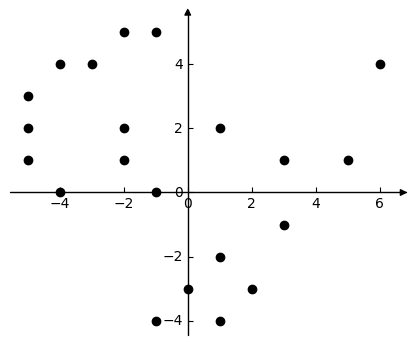

In [12]:
from matplotlib import pyplot as plt
from mpl_toolkits.axisartist.axislines import AxesZero

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(axes_class=AxesZero)

for direction in ["xzero", "yzero"]:
    # adds arrows at the ends of each axis
    ax.axis[direction].set_axisline_style("-|>")
    # adds X and Y-axis from the origin
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    # hides borders
    ax.axis[direction].set_visible(False)

for x, y in dino_vectors:
    ax.scatter(x, y, color="black")

ax.set_aspect("equal")

In [13]:
# from aquarel import load_theme
from matplotlib import pyplot as plt

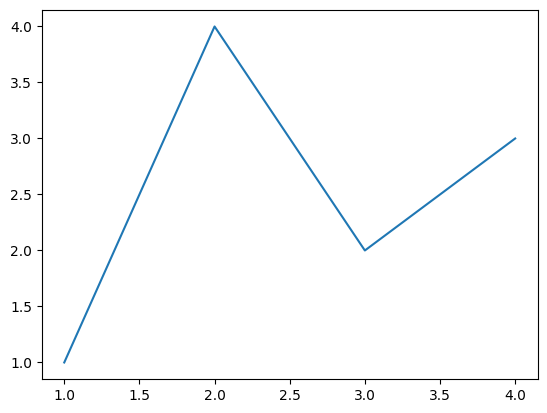

In [14]:
def draw() -> plt.figure:
    fig, ax = plt.subplots()
    ax.plot([1, 2, 3, 4], [1, 4, 2, 3])
    return fig


fig = draw()

In [15]:
# with load_theme("arctic_light"):
#     fig = draw()
#     print(f"{id(fig)}=")
#     fig.savefig("results/tmp_arctic_light.png")
#
# fig2 = draw()
# print(f"{id(fig2)}=")
# fig2.savefig("results/tmp_normal.png")

In [16]:
from dataclasses import dataclass


@dataclass
class Point2d:
    x: float
    y: float

TODO finish this workshop: https://realpython.com/mandelbrot-set-python/

> Knowing about object-oriented programming principles and recursion will enable you to take full advantage of Python’s expressive syntax to write clean code that reads almost like math formulas. 

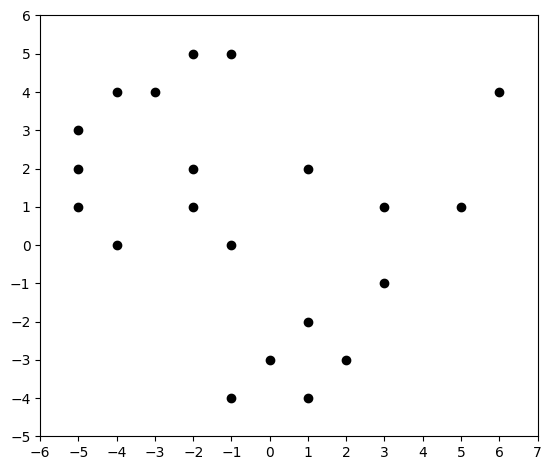

In [17]:
from math import ceil


# https://github.com/orlandpm/Math-for-Programmers/blob/master/Chapter%2002/Chapter%2002%20Walkthrough.ipynb
# https://realpython.com/python-kwargs-and-args/
def draw(objects: list[Point2d], kwargs={}) -> plt.figure:
    xs = [o.x for o in objects]
    ys = [o.y for o in objects]

    max_x, max_y, min_x, min_y = max(0, *xs), max(0, *ys), min(0, *xs), min(0, *ys)
    padding_percentage = 0.05
    padding_x = ceil((max_x - min_x) * padding_percentage)
    padding_y = ceil((max_y - min_y) * padding_percentage)

    fig, ax = plt.subplots()
    ax.set_xlim(min_x - padding_x, max_x + padding_x)
    ax.set_ylim(min_y - padding_y, max_y + padding_y)
    ax.set_xticks(range(min_x - padding_x, max_x + padding_x + 1))
    ax.set_yticks(range(min_y - padding_y, max_y + padding_y + 1))
    # ax.grid(True)

    ax.scatter(xs, ys, **kwargs)
    ax.set_aspect("equal")
    fig.tight_layout()
    return fig


dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

grid_points = [Point2d(x, y) for x, y in dino_vectors]
draw(grid_points, {"color": "black"})
plt.show()

id(fig)=4684687136

id(ax)=4692917376

id(fig_out)=4684687136

id(ax_out)=4692917376

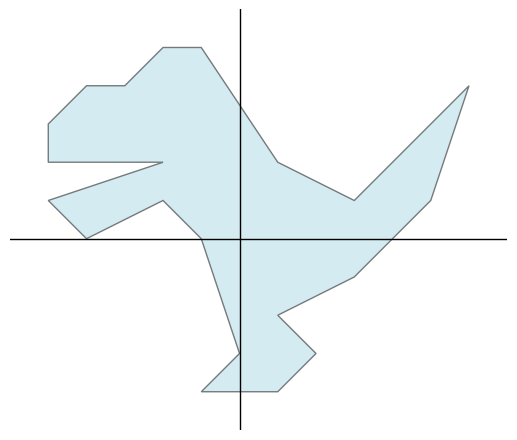

In [18]:
import matplotlib.pyplot as plt


def calculate_padding(values, percentage):
    """
    Calculate padding based on a list of values and a percentage.

    Parameters:
    values (list): A list of numeric values.
    percentage (float): The percentage of the range of values to use for padding.

    Returns:
    int: The calculated padding value.
    """
    max_val = max(values)
    min_val = min(values)
    padding = ceil((max_val - min_val) * percentage)
    return padding


def set_axis_limits_and_ticks(ax, values_x, values_y, padding_percentage):
    """
    Set axis limits and ticks based on provided values and padding percentage.

    Parameters:
    ax (matplotlib.axes.Axes): The axis object to set limits and ticks on.
    values_x (list): A list of numeric values for the x-axis.
    values_y (list): A list of numeric values for the y-axis.
    padding_percentage (float): The percentage of the range of values to use for padding.
    """
    min_x = min(values_x)
    max_x = max(values_x)
    min_y = min(values_y)
    max_y = max(values_y)

    padding_x = calculate_padding(values_x, padding_percentage)
    padding_y = calculate_padding(values_y, padding_percentage)

    ax.set_xlim(min_x - padding_x, max_x + padding_x)
    ax.set_ylim(min_y - padding_y, max_y + padding_y)
    ax.set_xticks(range(min_x - padding_x, max_x + padding_x + 1))
    ax.set_yticks(range(min_y - padding_y, max_y + padding_y + 1))

    ax.axhline(0, color="black", linewidth=1)
    ax.axvline(0, color="black", linewidth=1)

    return ax


def draw(objects, kwargs={}):
    """
    Draw points represented by 2D coordinates.

    Parameters:
    objects (list): A list of objects containing x and y attributes representing coordinates.
    kwargs: Additional keyword arguments to be passed to the scatter plot function.

    Returns:
    matplotlib.figure.Figure: The created figure.
    """
    xs = [o.x for o in objects]
    ys = [o.y for o in objects]

    padding_percentage = 0.05

    fig, ax = plt.subplots()

    set_axis_limits_and_ticks(ax, xs, ys, padding_percentage)

    ax.grid(True)
    ax.fill(xs, ys, **kwargs)
    ax.set_aspect("equal")
    print(f"{id(fig)=}")
    print(f"{id(ax)=}")
    fig.tight_layout()
    return fig, ax


dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

grid_points = [Point2d(x, y) for x, y in dino_vectors]
dino_settings = {"color": "lightblue", "edgecolor": "black", "alpha": 0.5}
fig_out, ax_out = draw(grid_points, dino_settings)

print(f"{id(fig_out)=}")
print(f"{id(ax_out)=}")

ax_out.grid(False)
ax_out.set_axis_off()

plt.show()

# Let's see where we can get

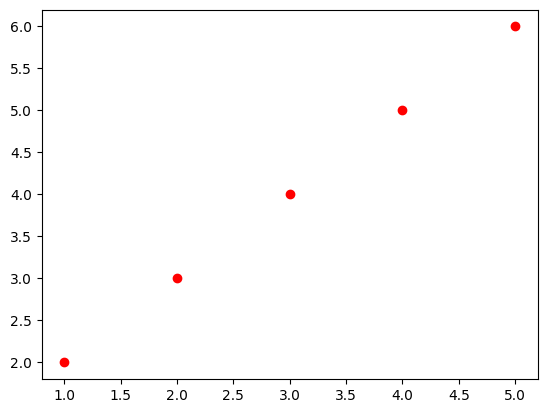

In [19]:
from matplotlib import pyplot as plt
from dataclasses import dataclass

fig, ax = plt.subplots()


@dataclass
class Point:
    x: float
    y: float

    def draw(self, fig, **kwargs):
        if fig:
            # axes = fig.get_axes()
            ax = fig.get_axes()[-1]
        else:
            fig, ax = plt.subplots()
        ax.scatter(self.x, self.y, **kwargs)
        return fig


p = Point(1, 2)
p2 = Point(2, 3)

for pint in [p, p2, Point(3, 4), Point(4, 5), Point(5, 6)]:
    fig = pint.draw(fig, color="red")

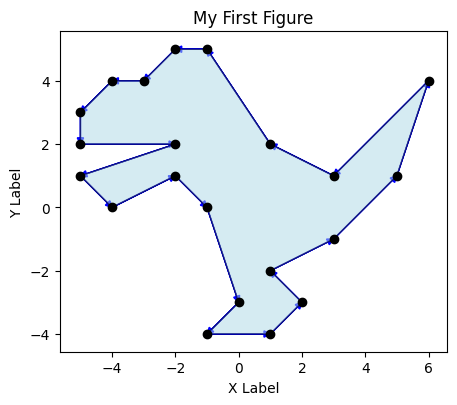

In [20]:
import matplotlib.pyplot as plt


class Plot:
    def __init__(self):
        self.fig, self.ax = plt.subplots()

    def add(self, objs, param_dict={}):
        # https://matplotlib.org/stable/users/explain/quick_start.html#making-a-helper-functions
        if not isinstance(objs, (list, tuple)):
            objs = [objs]  # Convert single object to a list with single element
        for obj in objs:
            obj.plot(self.ax, param_dict)
        return self

    def get_figure(self):
        return self.fig, self.ax


class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def plot(self, ax, param_dict):
        ax.plot(self.x, self.y, **param_dict)


class Vector:
    def __init__(self, start, end):
        self.start = start
        self.end = end

    def plot(self, ax, param_dict):
        ax.arrow(
            self.start.x,
            self.start.y,
            self.end.x - self.start.x,
            self.end.y - self.start.y,
            **param_dict,
        )


class Polygon:
    def __init__(self, points):
        self.points = points

    def plot(self, ax, param_dict):
        xs = [point.x for point in self.points]
        ys = [point.y for point in self.points]
        ax.fill(xs, ys, **param_dict)


dino_vectors = [
    (6, 4),
    (3, 1),
    (1, 2),
    (-1, 5),
    (-2, 5),
    (-3, 4),
    (-4, 4),
    (-5, 3),
    (-5, 2),
    (-2, 2),
    (-5, 1),
    (-4, 0),
    (-2, 1),
    (-1, 0),
    (0, -3),
    (-1, -4),
    (1, -4),
    (2, -3),
    (1, -2),
    (3, -1),
    (5, 1),
]

grid_points = [Point(x, y) for x, y in dino_vectors]
grid_vectors = [
    Vector(start, end)
    for start, end in zip(grid_points, grid_points[1:] + [grid_points[0]])
]

fig, ax = (
    Plot()
    .add(grid_points, {"marker": "o", "color": "black"})
    .add(
        grid_vectors,
        {
            "head_width": 0.2,
            "head_length": 0.2,
            "fc": "blue",
            "ec": "blue",
            "length_includes_head": "True",
        },
    )
    .add(
        Polygon(grid_points), {"color": "lightblue", "edgecolor": "black", "alpha": 0.5}
    )
    .get_figure()
)

fig.set_size_inches((5, 5))

ax.set_xlabel("X Label")
ax.set_aspect("equal")
ax.set_ylabel("Y Label")
ax.set_title("My First Figure")
plt.show()

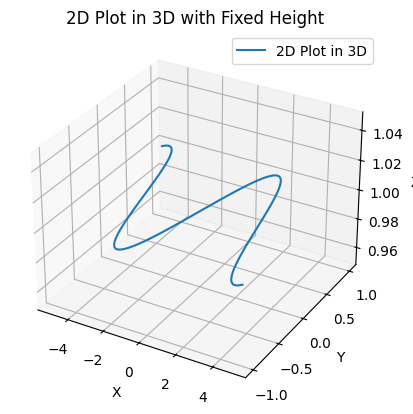

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define your 2D plot data
x = np.linspace(-5, 5, 100)
y = np.sin(x)

# Define the fixed height for the z-coordinate
fixed_height = 1.0

# Create a figure and 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plot the 2D data in 3D with the fixed height
ax.plot(x, y, zs=fixed_height, zdir="z", label="2D Plot in 3D")

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("2D Plot in 3D with Fixed Height")

# Show the plot
plt.legend()
plt.show()

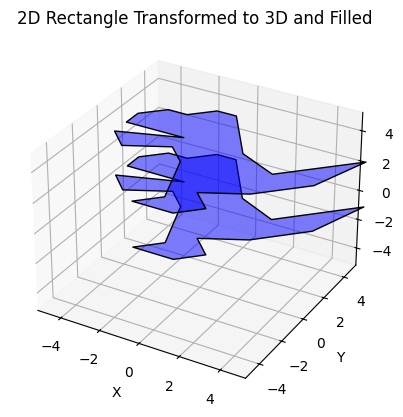

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Define the vertices of your 2D rectangle
# x = [1, 3, 3, 1]  # X coordinates
# y = [1, 1, 3, 3]  # Y coordinates
x = [point.x for point in grid_points]
y = [point.y for point in grid_points]

# Define the height for each vertex
# z = [2, 2, 2, 2]  # Heights in the third dimension
z = np.zeros_like(x)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Create vertices for the bottom face
verts = [list(zip(x, y, np.zeros_like(x)))]
verts2 = [list(zip(x, y, 3 * np.ones_like(x)))]
# Create vertices for the top face by adding the height to the z coordinates
# verts.append([(xi, yi, zi) for xi, yi, zi in zip(x, y, z)])

# print(verts)
# Create 3D polygon from the vertices
poly = Poly3DCollection(verts, alpha=0.5, facecolors="blue", edgecolors="black")
poly2 = Poly3DCollection(verts2, alpha=0.5, facecolors="blue", edgecolors="black")

# Add the polygon to the plot
ax.add_collection3d(poly)
ax.add_collection3d(poly2)

# Set labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("2D Rectangle Transformed to 3D and Filled")

# Set limits for better visualization
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

# Show the plot
plt.show()